# Paraglider flight mechanics in  2d

  $(m_1,x_1)$ pilot
  
  $(m_2,x_2)$ wing
  
  $F_x$, $F_y$, aerodynamic force in the rest system

In [1]:
def make_fig(x1,y1,x2,y2,CM=True,m1=1,m2=1):
    x1 = x1 - (m1*x1+m2*x2)/2
    y1 = y1 - (m1*y1+m2*y2)/2
    plts = []
    plts +=[ point((x1,y1),color='red')]
    plts +=[ point((x2,y2),color='brown')]
    plts +=[ line ([(x1,y1),(x2,y2)])]
    plts += [ellipse((x2,y2),1,.4,arctan2(y1-y2,x1-x2)-pi/2,fill=True,alpha=0.3)]
    plt = sum(plts)
    
    return plt

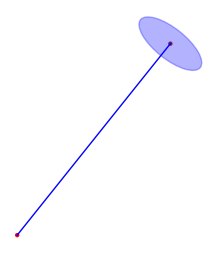

In [34]:
plt = make_fig(1,2,3,4)
plt.show(figsize=4,aspect_ratio=1,axes=false)

In [4]:
import numpy as np
var('t')
var('l g Fx Fy m1 m2')
xy_wsp = [('x1','x1'),('y1','y1'),('x2','x2'),('y2','y2')]

uv_wsp = [('phi','\phi'),('x','x'),('y','y')]

for v,lv in uv_wsp+xy_wsp:
    var("%s"%v,latex_name=r'%s'%lv)
    vars()[v.capitalize()] = function(v.capitalize())(t)
    var("%sdd"%v,latex_name=r'\ddot %s'%lv)
    var("%sd"%v,latex_name=r'\dot %s'%lv)
    var("d%s"%v,latex_name=r'\delta %s'%lv)

uv = [vars()[v] for v,lv in uv_wsp]

xy = [vars()[v] for v,lv in xy_wsp]
to_fun=dict()
for v,lv in uv_wsp:
    to_fun[vars()[v]]=vars()[v.capitalize()]
    to_fun[vars()[v+"d"]]=vars()[v.capitalize()].diff()
    to_fun[vars()[v+"dd"]]=vars()[v.capitalize()].diff(2)
to_var = dict((v,k) for k,v in to_fun.items())

x2u = {x2:x,y2:y, x1:x+l*sin(phi),y1:y-l*cos(phi)}

for w in xy:
    vars()['d'+repr(w)+'_polar']=sum([w.subs(x2u).diff(w2)*vars()['d'+repr(w2)] for w2 in uv])
    #show(vars()['d'+repr(w)+'_polar'])

dAlemb = (m1*x1.subs(x2u).subs(to_fun).diff(t,2))*dx1_polar + \
         (m1*y1.subs(x2u).subs(to_fun).diff(t,2)+m1*g)*dy1_polar+\
         (m2*x2.subs(x2u).subs(to_fun).diff(t,2)-Fx)*dx2_polar + \
         (m2*y2.subs(x2u).subs(to_fun).diff(t,2)+m2*g-Fy)*dy2_polar
dAlemb = dAlemb.subs(to_var)

In [5]:
show(dAlemb)

-(l*phid^2*sin(phi) - l*phidd*cos(phi) - xdd)*(dphi*l*cos(phi) + dx)*m1 + (dphi*l*sin(phi) + dy)*((l*phid^2*cos(phi) + l*phidd*sin(phi) + ydd)*m1 + g*m1) + (m2*xdd - Fx)*dx + (g*m2 + m2*ydd - Fy)*dy

In [35]:
rown=[]
for v in uv:
    rown.append(dAlemb.expand().coefficient(vars()['d'+repr(v)]).trig_simplify())
drugie =   [vars()[repr(v)+'dd'] for v in uv]
table(rown)


,,


In [7]:
#drugie =   [vars()[repr(v)+'dd'] for v in uv]
sol = solve( rown,drugie)
show( map(lambda x:x.trig_simplify(),sol[0]) )

[phidd == -(Fx*cos(phi) + Fy*sin(phi))/(l*m2),
 xdd == (l*m1*m2*phid^2*sin(phi) + Fx*m1*cos(phi)^2 + Fy*m1*cos(phi)*sin(phi) + Fx*m2)/(m1*m2 + m2^2),
 ydd == -(l*m1*m2*phid^2*cos(phi) - Fx*m1*cos(phi)*sin(phi) - Fy*m1*sin(phi)^2 + g*m2^2 + (g*m1 - Fy)*m2)/(m1*m2 + m2^2)]

In [8]:
rhs = map(lambda x:x.rhs().trig_simplify(),sol[0])
show(rhs)

[-(Fx*cos(phi) + Fy*sin(phi))/(l*m2),
 (l*m1*m2*phid^2*sin(phi) + Fx*m1*cos(phi)^2 + Fy*m1*cos(phi)*sin(phi) + Fx*m2)/(m1*m2 + m2^2),
 -(l*m1*m2*phid^2*cos(phi) - Fx*m1*cos(phi)*sin(phi) - Fy*m1*sin(phi)^2 + g*m2^2 + (g*m1 - Fy)*m2)/(m1*m2 + m2^2)]

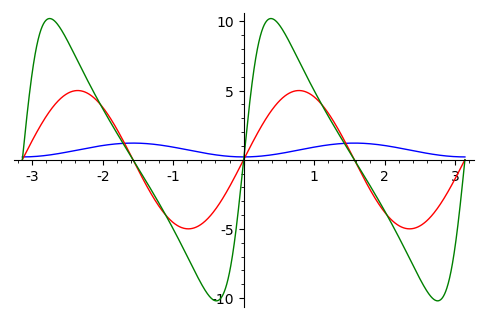

In [9]:
Cx(x) = .2+sin(x)^2
Cz(x) = 5*sin(x*2)
plot(Cx(x),(x,-pi,pi),figsize=5)+\
 plot(Cz(x),(x,-pi,pi),color='red')+\
 plot(Cz(x)/Cx(x),(x,-pi,pi),color='green')

In [10]:
#Cx = lambda x:1.0
#Cz = lambda x:1.0
trim = -0.24
alpha = arctan2(yd,xd)
forces={Fx:(-Cx(phi-alpha+trim)*cos(alpha) - Cz(phi-alpha+trim)*sin(alpha) )*(xd^2+yd^2),Fy:(-Cx(phi-alpha+trim)*sin(alpha) + Cz(phi-alpha+trim)*cos(alpha))*(xd^2+yd^2)}
#show( map(lambda x:x.subs(forces),rhs) )
dof3 = [phid,xd,yd] + map(lambda x:x.subs(forces),rhs)

In [19]:
%%time
params = {m1:1.3,m2:2,l:1}
ode = map(lambda x:x.subs(params), dof3) 
times = srange(0,8,0.1)
numsol = desolve_odeint(ode,[0,0,0,.0,2.21,4], \
                        times, [phi,x,y,phid,xd,yd])

CPU times: user 631 ms, sys: 11.1 ms, total: 643 ms
Wall time: 635 ms


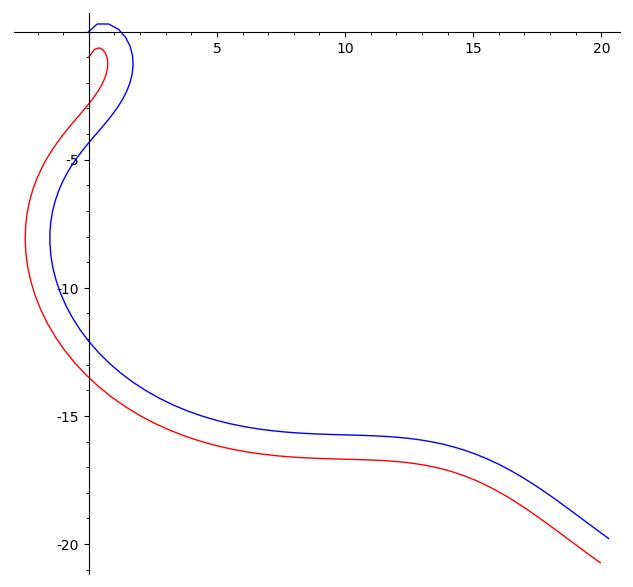

In [20]:
p = line(zip(numsol[:,1],numsol[:,2]),figsize=9)#,marker='o')
p += line(zip(numsol[:,1]+np.sin(numsol[:,0]),numsol[:,2]-np.cos(numsol[:,0])),color='red',aspect_ratio=1)#,marker='o')
p.show()

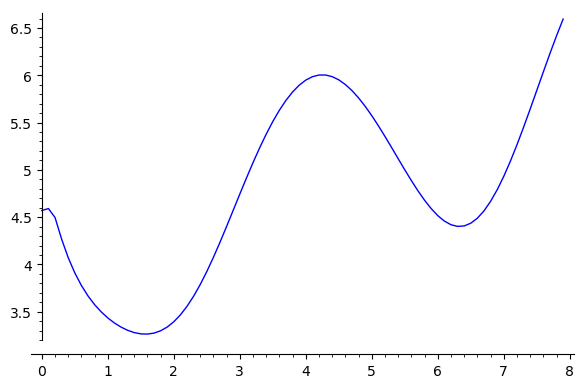

In [21]:
line(zip(times,np.sqrt(numsol[:,4]**2+numsol[:,5]**2)) )

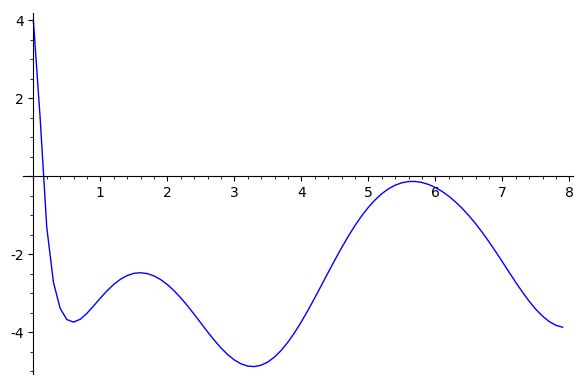

In [22]:
line(zip(times,numsol[:,5]) )

In [23]:
every = max(int(numsol.shape[0]/25),1)
every

3

In [28]:
def plot_system(data,l=1):
    phi,x,y = data[0:3]
    w,vx,vy = data[3:]
    x2,y2 = x+l*sin(phi),y-l*cos(phi)
    p =  point((x,y),size=40,color='blue',figsize=4)
    p += point((x2,y2),size=40,color='red')
    p += line([(x,y),(x2,y2)])
    v = vector([vx,vy])
    if v.norm()>0:
        v = v/v.norm()
        p += arrow((x,y),(x+v[0],y+v[1]),aspect_ratio=1)
    return p

In [29]:
plts = [p+plot_system(data,l=1) for data in numsol[::every,:]]

Animation with 27 frames
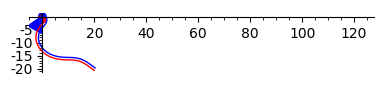

CPU times: user 4.36 s, sys: 68.9 ms, total: 4.43 s
Wall time: 4.98 s


In [30]:
%%time
anim = animate(plts,xmax=125)
anim.show()

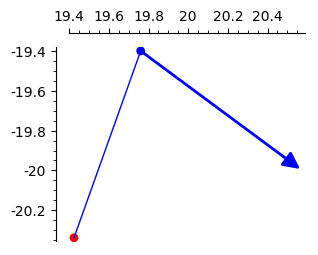

In [31]:
plot_system(data,l=1)

## $C_L$ from data

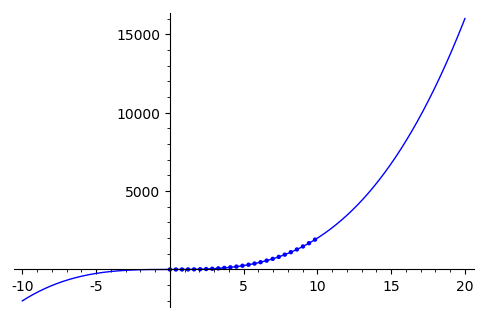

1.9998453968658663*x^3 + 0.35869577232912225

In [32]:
data = [(x,2*x^3+random()*0.61) for x in srange(0.,10,0.41)]
plt = point(data)
var('c b')
model(x) = c*x^3 + b
fit = find_fit( data, model, solution_dict=True)
plt_m = plot(model(x).subs(fit),(x,-10,20))
(plt_m+plt).show(figsize=5)
model(x).subs(fit)

\newpage